# Programming Assignment # 4 Clustering

## Student Details

 name: Jayachandra Jarajapu 

ID: 1001964536

NetID: jxj4536

## Rules

1. Work is to be done
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files . 

The target variable for the clustering dataset is column "class" which should be(<=50 k and >50k).

The target variable for the college dataset is column "Grad.Rate" which should be (<=50k and >50k )




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [2]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import seaborn as sns
import numpy as np
import pandas as pd

#for splitting up data 
from sklearn.model_selection import train_test_split 

#to generqte classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

#helps when perfororming kmeans via elbow method
from sklearn.cluster import KMeans

#IMPORTING LABERENCODER to fit the data set 
from sklearn.preprocessing import LabelEncoder

# for plotting 
import matplotlib.pyplot as plt
%matplotlib inline

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [3]:
#########################begin code for Task 1-a

#import College.csv from the location
df_college = pd.read_csv("College.csv", index_col = 0)
#retriveing top 5 records
df_college.head()
#########################begin code for Task 1-a


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#as grad.rate is our target variable just checking if max and min

max=df_college['Grad.Rate'].max()
min=df_college['Grad.Rate'].min()

print(min,max)


# here we can see the grad.rate upper bound is 118  so instead of making record to 100 we are directly 
#labelling it as 1


10 118


In [5]:
# trying to assign catogorical valyues to grad.rate = as 1  and zero 
#for for those records where its value is more than 50 it has 1 and rest all the records will have 0
#observed one record with 118 rating 

df_college['Grad.Rate'] = pd.cut(df_college['Grad.Rate'],[0,50,118],labels=[0,1])

df_college.dtypes


Private          object
Apps              int64
Accept            int64
Enroll            int64
Top10perc         int64
Top25perc         int64
F.Undergrad       int64
P.Undergrad       int64
Outstate          int64
Room.Board        int64
Books             int64
Personal          int64
PhD               int64
Terminal          int64
S.F.Ratio       float64
perc.alumni       int64
Expend            int64
Grad.Rate      category
dtype: object

In [6]:
#we are using laber encoder to fit trasforme the data frame 
le = LabelEncoder()
# apply "le.fit_transform"
df_college = df_college.apply(le.fit_transform)

In [7]:
df_college.head()
#making sure that data was gone thorugh pre processing phase

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,352,337,356,22,40,460,275,169,98,23,232,46,42,120,12,219,1
Adelphi University,1,414,452,286,15,17,441,405,440,520,98,137,7,2,61,16,541,1
Adrian College,1,314,318,182,21,38,178,84,388,188,17,90,29,30,68,30,401,1
Agnes Scott College,1,57,61,42,58,77,31,57,466,442,23,48,68,61,20,37,713,1
Alaska Pacific University,1,8,6,3,15,32,3,358,175,251,105,137,52,36,58,2,560,0


In [8]:
df_college.dtypes
#making sure that data was gone thorugh pre processing phase

Private        int64
Apps           int64
Accept         int64
Enroll         int64
Top10perc      int64
Top25perc      int64
F.Undergrad    int64
P.Undergrad    int64
Outstate       int64
Room.Board     int64
Books          int64
Personal       int64
PhD            int64
Terminal       int64
S.F.Ratio      int64
perc.alumni    int64
Expend         int64
Grad.Rate      int64
dtype: object

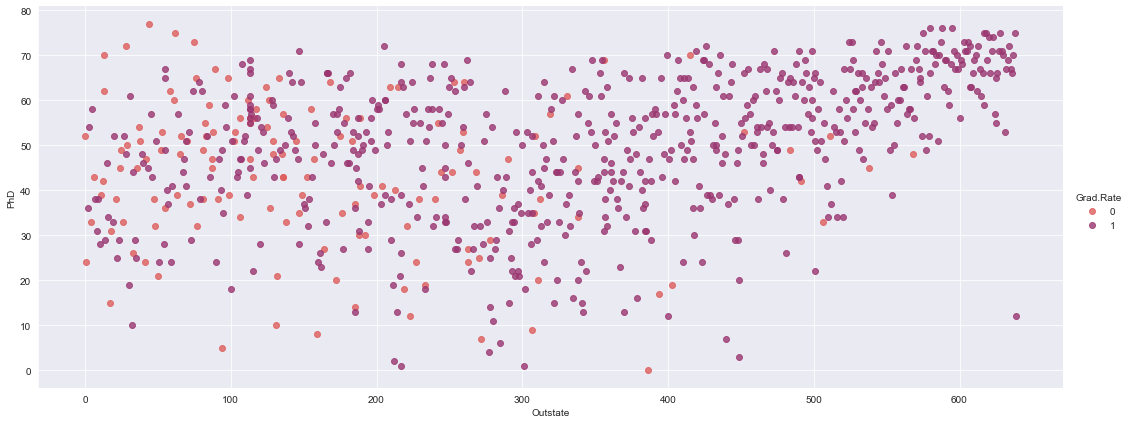

In [9]:
#USING sns.lmplot (seaborn.axisgrid.FacetGrid ) comparing paying out state, PhD and their grad.rate

sns.set_style('darkgrid')
sns.lmplot(x = 'Outstate',y ='PhD', data=df_college, hue='Grad.Rate',
           palette='flare',height=6,aspect=2.5,fit_reg=False)

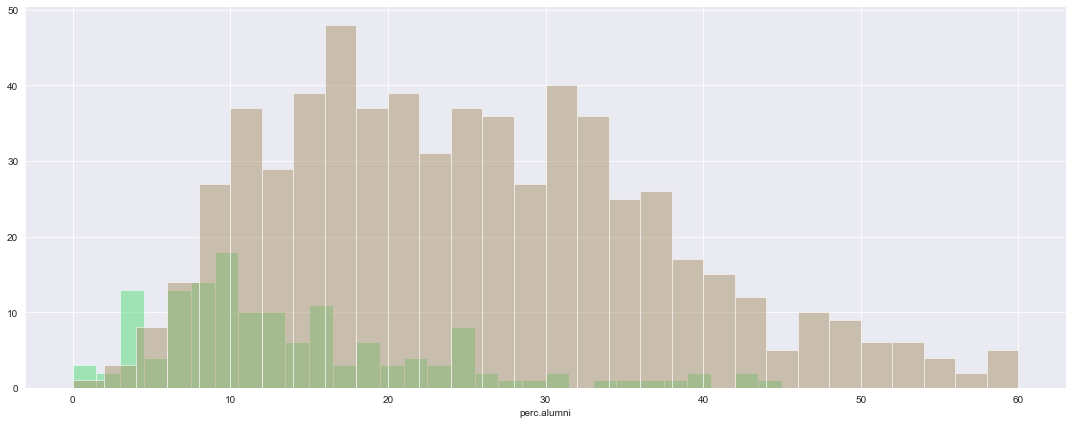

In [10]:
# using sns.FacetGrid, creating histogram in dark grid for the Grad.Rate and perc.alumni

sns.set_style('darkgrid')
g = sns.FacetGrid(df_college,hue="Grad.Rate",palette='terrain',height=6,aspect=2.5)
g = g.map(plt.hist,'perc.alumni',bins=30,alpha=0.5)

In [11]:
#checking for columns with null values
df_college.isna().any()
# seems the dataset has no null values

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

Taking the whole given dataset for performing elbow method


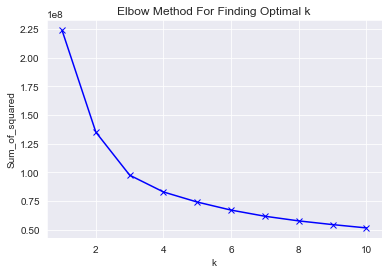

82833773.55338144
Assuming k = 3(clusters) is an Optimal value using Elbow Method


In [12]:
print("Taking the whole given dataset for performing elbow method")

#kmeans by elbow method as required we are taking up 1-10 k values
#here creating a list to store SSE 
Sum_of_squared = []
n_clusters = range(1,11)
for K in n_clusters:
    kmeansmodel = KMeans(n_clusters=K)
    kmeansmodel = kmeansmodel.fit(df_college)
    Sum_of_squared.append(kmeansmodel.inertia_)
    
plt.plot(n_clusters, Sum_of_squared, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared')
plt.title('Elbow Method For Finding Optimal k')
plt.show()
print(Sum_of_squared[3]);
print("Assuming k = 3(clusters) is an Optimal value using Elbow Method");

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [13]:
#listed all columns values in a list 
columns = ["Private","Apps","Accept","Enroll","Top10perc","Top25perc","F.Undergrad","P.Undergrad","Outstate","Room.Board","Books","Personal","PhD","Terminal","S.F.Ratio","perc.alumni","Expend"]

In [14]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!

#target variable 

X = df_college[columns]
Y = df_college['Grad.Rate']

# Splitting dataset into  training set and testing set
# 70% training and 30% test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2022)

###################end code for Task 1-b-1

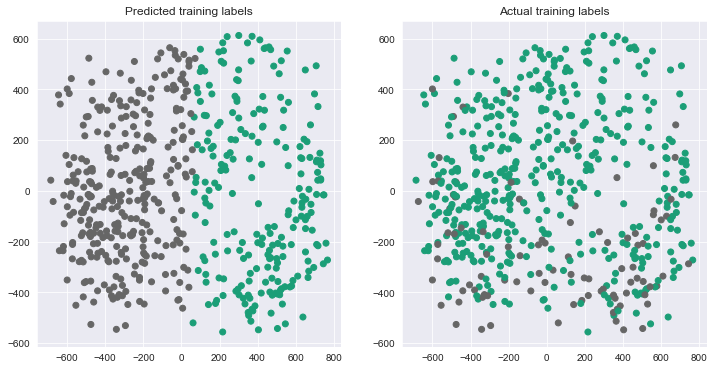

In [15]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model

kmeans_model = KMeans(n_clusters=2, random_state=2022).fit(X_train)
labels = kmeans_model.predict(X_train)
centroids = kmeans_model.cluster_centers_


# Compute cluster centers and predict cluster index for each sample 
f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

# Model and fit the data to the PCA model
X_train_pca = PCA(2)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
plot_columns = X_train_pca.fit_transform(X_train)
plt.title('Predicted training labels')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels, cmap='Dark2_r')


plt.subplot(1,2,2)
plt.title('Actual training labels')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_train, cmap='Dark2_r')

###################end code for Task 1-b-2






Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

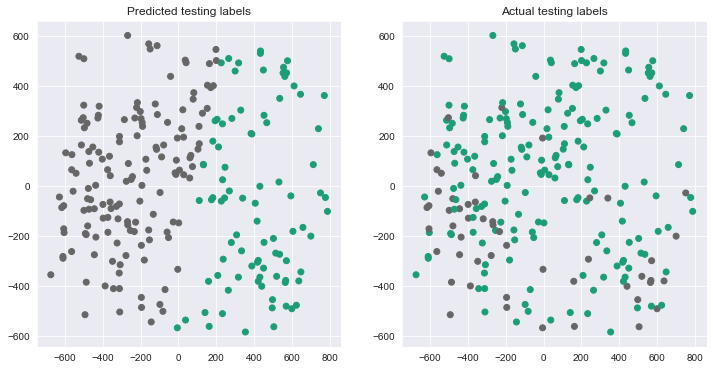

In [16]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels



# predict cluster index for each sample 
test_labels = kmeans_model.predict(X_test)
centroids = kmeans_model.cluster_centers_


# Model and fit the data to the PCA model
X_test_pca = PCA(2)

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
plot_columns = X_test_pca.fit_transform(X_test)
plt.title('Predicted testing labels')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=test_labels, cmap='Dark2_r')


plt.subplot(1,2,2)
plt.title('Actual testing labels')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_test, cmap='Dark2_r')


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [17]:
###################begin code for Task 1-b-4: Print out a confusion matrix

# print the confusion matrix and report
print (confusion_matrix(Y_train,labels))
print (confusion_matrix(Y_test,test_labels))

###################end code for Task 1-b-4

[[ 47  48]
 [271 177]]
[[ 34  17]
 [112  71]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [18]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)
cosine_distance = pairwise_distances(pdm_train, metric='cosine')
euclidean_distance = pairwise_distances(pdm_train, metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train, metric='manhattan')


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
hie_agglo_cosine_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='complete')
y_hie_agglo_cosine_complete = hie_agglo_cosine_complete.fit_predict(cosine_distance)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
hie_agglo_euclidean_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='complete')
y_hie_agglo_euclidean_complete = hie_agglo_euclidean_complete.fit_predict(euclidean_distance)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
hie_agglo_manhattan_complete = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='complete')
y_hie_agglo_manhattan_complete = hie_agglo_manhattan_complete.fit_predict(manhattan_distance)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
hie_agglo_cosine_average = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='average')
y_hie_agglo_cosine_average = hie_agglo_cosine_average.fit_predict(cosine_distance)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
hie_agglo_euclidean_average = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='average')
y_hie_agglo_euclidean_average = hie_agglo_euclidean_average.fit_predict(euclidean_distance)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
hie_agglo_manhattan_average = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='average')
y_hie_agglo_manhattan_average = hie_agglo_manhattan_average.fit_predict(manhattan_distance)



print("F1-score for complete linkage + cosine:", f1_score(Y_train, y_hie_agglo_cosine_complete))
print("F1-score for complete linkage + euclidean:", f1_score(Y_train, y_hie_agglo_euclidean_complete))
print("F1-score for complete linkage + manhattan:", f1_score(Y_train, y_hie_agglo_manhattan_complete))
print("F1-score for average linkage + cosine:", f1_score(Y_train, y_hie_agglo_cosine_average))
print("F1-score for average linkage + euclidean:", f1_score(Y_train, y_hie_agglo_euclidean_average))
print("F1-score for average linkage + manhattan:", f1_score(Y_train, y_hie_agglo_manhattan_average))



###################end code for Task 2-a

F1-score for complete linkage + cosine: 0.6283309957924264
F1-score for complete linkage + euclidean: 0.6979166666666667
F1-score for complete linkage + manhattan: 0.7593984962406015
F1-score for average linkage + cosine: 0.6008583690987125
F1-score for average linkage + euclidean: 0.6604774535809018
F1-score for average linkage + manhattan: 0.6188466947960619


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

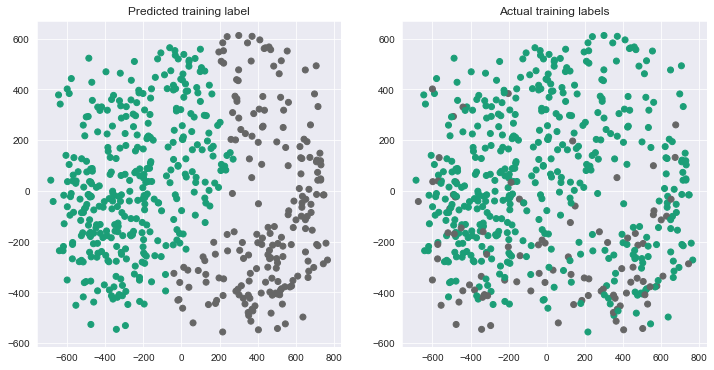

In [19]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 
# Modelling to fit the data to the PCA model
X_train_pca = PCA(2)

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

plot_columns = X_train_pca.fit_transform(X_train)
plt.title('Predicted training label')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=y_hie_agglo_manhattan_complete, cmap='Dark2_r')


plt.subplot(1,2,2)
plt.title('Actual training labels')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_train, cmap='Dark2_r')

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

F1-score for complete linkage + cosine: 0.6691519105312209
F1-score for complete linkage + euclidean: 0.6333973128598849
F1-score for complete linkage + manhattan: 0.3995243757431629
F1-score for average linkage + cosine: 0.4889380530973451
F1-score for average linkage + euclidean: 0.419953596287703
F1-score for average linkage + manhattan: 0.6007905138339921


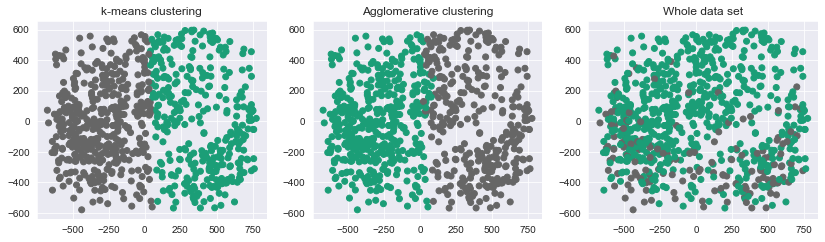

In [20]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
# Create the KMeans model
kmeans_model_labels = KMeans(n_clusters=2, random_state=2022).fit_predict(df_college.iloc[:,:17])


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(df_college.iloc[:,:17])
cosine_distance = pairwise_distances(pdm_train, metric='cosine')
euclidean_distance = pairwise_distances(pdm_train, metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train, metric='manhattan')


# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
hie_agglo_cosine_complete_p = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='complete')
hie_agglo_cosine_complete = hie_agglo_cosine_complete_p.fit_predict(cosine_distance)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
hie_agglo_euclidean_complete_p = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='complete')
hie_agglo_euclidean_complete = hie_agglo_euclidean_complete_p.fit_predict(euclidean_distance)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
hie_agglo_manhattan_complete_p = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='complete')
hie_agglo_manhattan_complete = hie_agglo_manhattan_complete_p.fit_predict(manhattan_distance)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
hie_agglo_cosine_average_p = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='average')
hie_agglo_cosine_average = hie_agglo_cosine_average_p.fit_predict(cosine_distance)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
hie_agglo_euclidean_average_p = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='average')
hie_agglo_euclidean_average = hie_agglo_euclidean_average_p.fit_predict(euclidean_distance)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
hie_agglo_manhattan_average_p = AgglomerativeClustering(n_clusters = 2, affinity = 'precomputed', linkage ='average')
hie_agglo_manhattan_average = hie_agglo_manhattan_average_p.fit_predict(manhattan_distance)



print("F1-score for complete linkage + cosine:", f1_score(df_college['Grad.Rate'], hie_agglo_cosine_complete))
print("F1-score for complete linkage + euclidean:", f1_score(df_college['Grad.Rate'], hie_agglo_euclidean_complete))
print("F1-score for complete linkage + manhattan:", f1_score(df_college['Grad.Rate'], hie_agglo_manhattan_complete))
print("F1-score for average linkage + cosine:", f1_score(df_college['Grad.Rate'], hie_agglo_cosine_average))
print("F1-score for average linkage + euclidean:", f1_score(df_college['Grad.Rate'], hie_agglo_euclidean_average))
print("F1-score for average linkage + manhattan:", f1_score(df_college['Grad.Rate'], hie_agglo_manhattan_average))


# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(2)

f, axs = plt.subplots(figsize=(14,8))
plot_columns = X_pca.fit_transform(df_college.iloc[:,:17])
plt.subplot(2,3,1)
plt.title('k-means clustering')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=kmeans_model_labels, cmap='Dark2_r')

#plt.show()

plt.subplot(2,3,2)
plt.title('Agglomerative clustering')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=hie_agglo_cosine_complete, cmap='Dark2_r')
#plt.show()

plt.subplot(2,3,3)
plt.title('Whole data set')
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=df_college['Grad.Rate'], cmap='Dark2_r')
#plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [21]:
###################begin code for Task 3-b

print("Confusion Matrix of Kmeans\n")
print (confusion_matrix(df_college['Grad.Rate'],kmeans_model_labels))

print("Confusion Matrix of Agglomerative Clustering\n")
print (confusion_matrix(df_college['Grad.Rate'],hie_agglo_cosine_complete))

print("--------------------------------------------------------------------------------")

print("Classification Report of Kmeans\n")
print(classification_report(df_college['Grad.Rate'],kmeans_model_labels))

print("Classification Report of Agglomerative Clustering\n")
print(classification_report(df_college['Grad.Rate'],hie_agglo_cosine_complete))



print("Comparing accuracy")

print("The accuracy for Kmeans Percent - 46% and Agglomerative Clustering Percent - 54%")

print("The accuracy of the model is good when the data is trained with Agglomerative Clustering compared to K-Means Clustering ")


###################end code for Task 3-b

Confusion Matrix of Kmeans

[[ 83  63]
 [357 274]]
Confusion Matrix of Agglomerative Clustering

[[ 63  83]
 [272 359]]
--------------------------------------------------------------------------------
Classification Report of Kmeans

              precision    recall  f1-score   support

           0       0.19      0.57      0.28       146
           1       0.81      0.43      0.57       631

    accuracy                           0.46       777
   macro avg       0.50      0.50      0.42       777
weighted avg       0.70      0.46      0.51       777

Classification Report of Agglomerative Clustering

              precision    recall  f1-score   support

           0       0.19      0.43      0.26       146
           1       0.81      0.57      0.67       631

    accuracy                           0.54       777
   macro avg       0.50      0.50      0.47       777
weighted avg       0.69      0.54      0.59       777

Comparing accuracy
The accuracy for Kmeans Percent - 46% and 

Comparing precision

Precision of Kmeans for macro average is 0.50 and weighted average is 0.70

Precision of Agglomerative Clustering for macro average is 0.50 and weighted average is 0.69


we can see that Agglomerative Clustering is doing better than kmeans in both weighted average and macro average for precision

------------------------------------------------------------------------------------------------------------
Comparing Recall

Recall of Kmeans for macro average is 0.50 and weighted average is 0.46

Recall of Agglomerative Clustering for macro average is 0.50 and weighted average is 0.54


we can see that Agglomerative Clustering is doing better than kmeans in both weighted average and macro average for Recall

------------------------------------------------------------------------------------------------------------
Comparing F1-score

F1-score of Kmeans for macro average is 0.42 and weighted average is 0.51

F1-score of Agglomerative Clustering for macro average is 0.47 and weighted average is 0.59


we can see that Agglomerative Clustering is doing better than kmeans in both weighted average and macro average for F1-score






Reasoning -- 

Hierarchical Agglomerative Clustering is doing better than kmeans cause its way of visualization of data is diffrent and path oriented. and we dont have to mention no' of cluster and loses away the burden for finding optimal k value

The flexibility to explore data in form of dendrograms, which offers grip analysing two data points
Furthermore, being able to visualize the route of each data point makes Hierarchical Agglomerative Clustering more effective in examining similarities between individual clusters.

References --- 

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- https://www.w3schools.com/python/python_lists.asp

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining the assignment and it's implementation.
    


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points